## ライブラリの読み込み

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## データの読み込み

In [ ]:
!ls /content/drive/MyDrive/iris

sample_submit.csv  submit.csv  test.tsv  train.tsv


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/iris/train.tsv", sep='\t')
test = pd.read_csv("/content/drive/MyDrive/iris/test.tsv", sep='\t')
sample_submit = pd.read_csv("/content/drive/MyDrive/iris/sample_submit.csv", header=None)

In [ ]:
sample_submit.head()

,0,1
0,2,Iris-setosa
1,7,Iris-versicolor
2,8,Iris-virginica
3,10,Iris-setosa
4,13,Iris-versicolor


In [ ]:
train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor


In [ ]:
test.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,2,6.1,2.8,4.7,1.2
1,7,6.3,2.5,4.9,1.5
2,8,6.2,3.4,5.4,2.3
3,10,6.7,3.1,4.7,1.5
4,13,5.0,3.4,1.6,0.4


## データの可視化

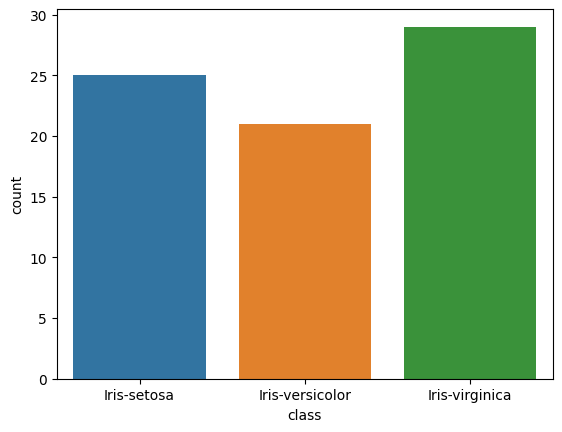

In [ ]:
sns.countplot(x="class", data=train)
plt.show()

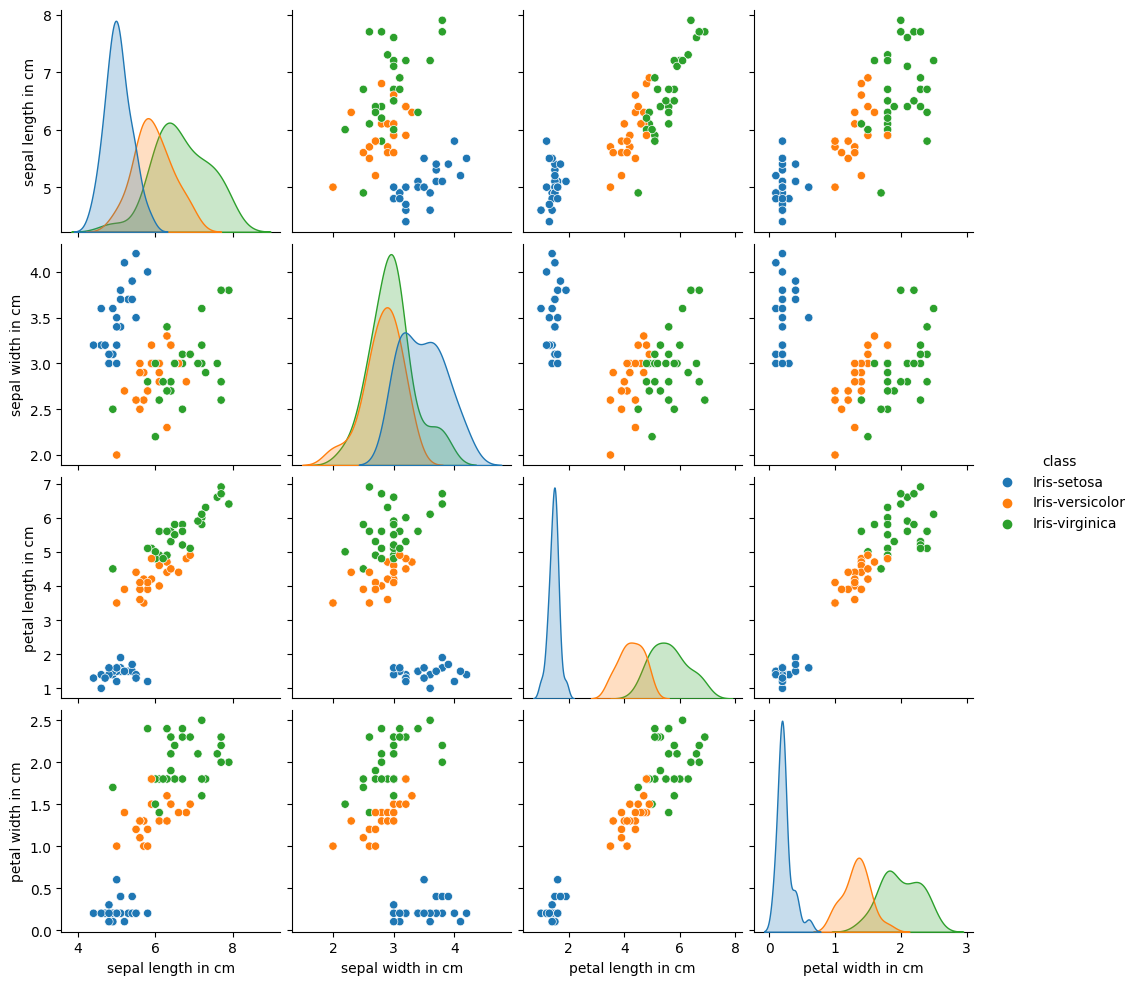

In [ ]:
sns.pairplot(train[['class', 'sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']], hue="class")
plt.show()

## データ前処理

### class

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['class'] = le.fit_transform(train['class'])
train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,0
1,1,6.8,2.8,4.8,1.4,1
2,3,6.1,3.0,4.9,1.8,2
3,4,6.4,3.2,5.3,2.3,2
4,5,6.3,3.3,4.7,1.6,1


In [ ]:
print(le.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
data = pd.concat([train, test], sort=False)

In [ ]:
data.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,0.0
1,1,6.8,2.8,4.8,1.4,1.0
2,3,6.1,3.0,4.9,1.8,2.0
3,4,6.4,3.2,5.3,2.3,2.0
4,5,6.3,3.3,4.7,1.6,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 74
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  150 non-null    int64  
 1   sepal length in cm  150 non-null    float64
 2   sepal width in cm   150 non-null    float64
 3   petal length in cm  150 non-null    float64
 4   petal width in cm   150 non-null    float64
 5   class               75 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 8.2 KB


In [ ]:
print(len(train), len(test), len(data))

75 75 150


In [ ]:
data.isnull().sum()

id                     0
sepal length in cm     0
sepal width in cm      0
petal length in cm     0
petal width in cm      0
class                 75
dtype: int64

In [ ]:
train = data[:len(train)]
test = data[len(train):]

In [ ]:
y_train = train['class']
X_train = train.drop('class', axis = 1)
X_test = test.drop('class', axis = 1)

In [ ]:
X_train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,0,5.3,3.7,1.5,0.2
1,1,6.8,2.8,4.8,1.4
2,3,6.1,3.0,4.9,1.8
3,4,6.4,3.2,5.3,2.3
4,5,6.3,3.3,4.7,1.6


In [ ]:
y_train.head()

0    0.0
1    1.0
2    2.0
3    2.0
4    1.0
Name: class, dtype: float64

## ランダムフォレストで学習

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
y_pred[:10]

array([1., 1., 2., 1., 0., 0., 2., 1., 0., 2.])

In [ ]:
y_pred = y_pred.astype(int)
y_pred[:10]

array([1, 1, 2, 1, 0, 0, 2, 1, 0, 2])

In [ ]:
y_pred = le.inverse_transform(y_pred)

In [ ]:
y_pred[:10]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [ ]:
print(le.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## 提出

In [ ]:
sub = sample_submit
sub[1] = y_pred
sub.to_csv("/content/drive/MyDrive/iris/submit.csv", index=False, header=False)